In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart (2).csv to heart (2).csv


In [ ]:
df = pd.read_csv('heart (2).csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
df.dropna(inplace=True)

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear',C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

Accuracy: 0.8146341463414634

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_linear))

Confusion Matrix
[[72 30]
 [ 8 95]]


In [ ]:
svm_poly = SVC(kernel = 'poly',degree =3,C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("\nClassification Report:\n", classification_report(y_test, y_pred_poly))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_poly))

Accuracy: 0.9073170731707317

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       102
           1       0.86      0.98      0.91       103

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205

Confusion Matrix
[[ 85  17]
 [  2 101]]


In [ ]:


df['target'].value_counts()

,count
target,
1,526
0,499


In [ ]:
svm_rbf =  SVC(kernel='rbf',C=1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_rbf))

Accuracy: 0.8878048780487805

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

Confusion Matrix
[[85 17]
 [ 6 97]]


Example 2 Loan Prediction problem Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


In [ ]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df['Married']= df['Married'].fillna(df['Married'].mode()[0])

In [ ]:
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Credit_History','LoanAmount','ApplicantIncome','Loan_Amount_Term','Education']]
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

from sklearn.svm import SVC

svm_linear = SVC(kernel='linear',C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_linear))

Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix
[[18 25]
 [ 1 79]]


In [ ]:
display(coefficients_df)

,Feature,Coefficient
0,Credit_History,6.940892e-01
4,Education,1.763277e-04
3,Loan_Amount_Term,3.420090e-05
2,ApplicantIncome,-8.718068e-07
1,LoanAmount,-3.146913e-06


In [ ]:
svm_poly = SVC(kernel = 'poly',degree =3,C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("\nClassification Report:\n", classification_report(y_test, y_pred_poly))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_poly))

Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix
[[18 25]
 [ 1 79]]


In [ ]:
svm_rbf =  SVC(kernel='rbf',C=1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_rbf))

Accuracy: 0.7723577235772358

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Confusion Matrix
[[18 25]
 [ 3 77]]


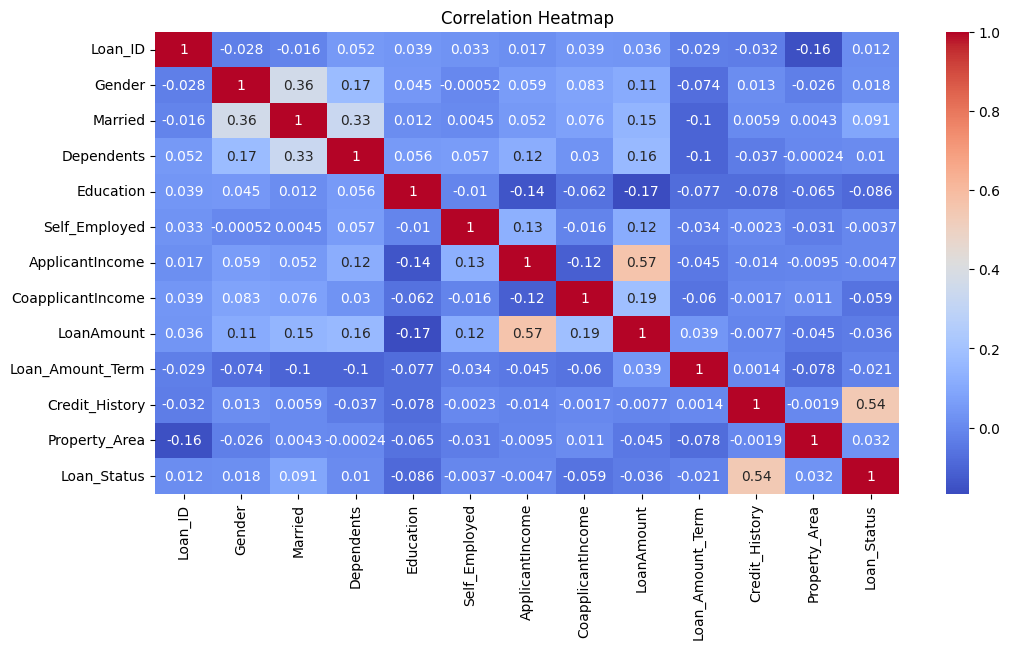

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
svm_pca = SVC(kernel='linear', C=1)
svm_pca.fit(X_train_pca, y_train)


SVC(C=1, kernel='linear')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

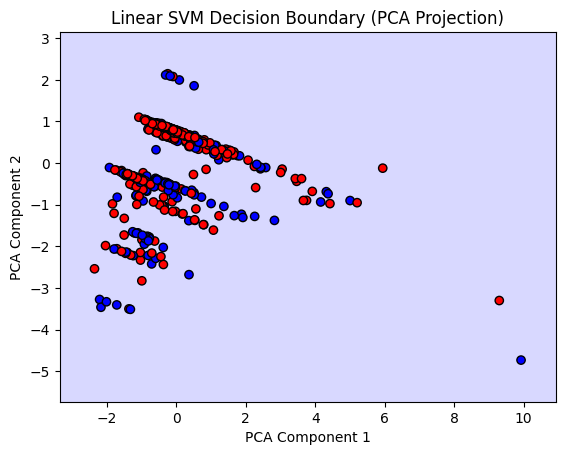

In [ ]:
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],
            c=y_train, cmap='bwr', edgecolors='k')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Linear SVM Decision Boundary (PCA Projection)')
plt.show()


In [ ]:
from sklearn.svm import SVC

svm_poly = SVC(kernel='poly', degree=3, C=1, gamma='scale')
svm_poly.fit(X_train, y_train)


SVC(C=1, kernel='poly')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


In [ ]:
svm_poly_pca = SVC(kernel='poly', degree=3, C=1, gamma='scale')
svm_poly_pca.fit(X_train_pca, y_train)


SVC(C=1, kernel='poly')

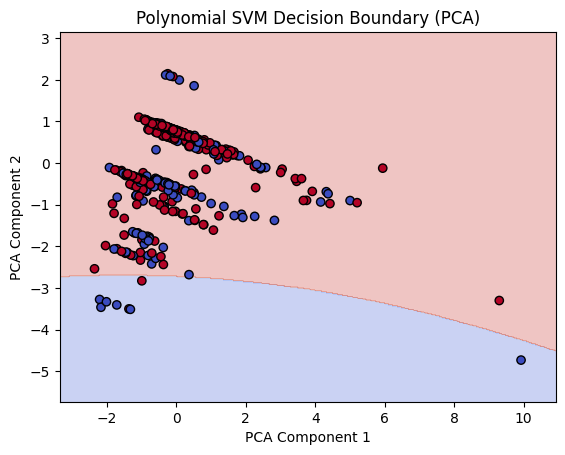

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() + 1
y_min, y_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

Z = svm_poly_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],
            c=y_train, cmap='coolwarm', edgecolors='k')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Polynomial SVM Decision Boundary (PCA)')
plt.show()


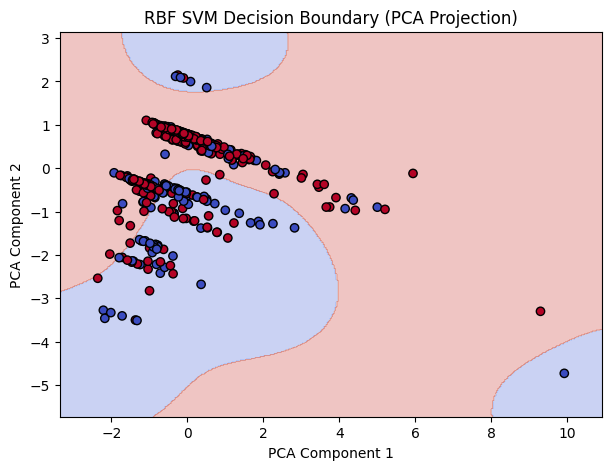

In [ ]:
# RBF SVM + PCA visualization (ONE CELL)

from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1. Train real RBF SVM (full feature space)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

# 2. PCA to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# 3. Train RBF SVM on PCA data (plot-only)
svm_rbf_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_pca.fit(X_train_pca, y_train)

# 4. Create mesh grid
x_min, x_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() + 1
y_min, y_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

# 5. Predict over grid
Z = svm_rbf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Plot decision boundary
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],
            c=y_train, cmap='coolwarm', edgecolors='k')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('RBF SVM Decision Boundary (PCA Projection)')
plt.show()


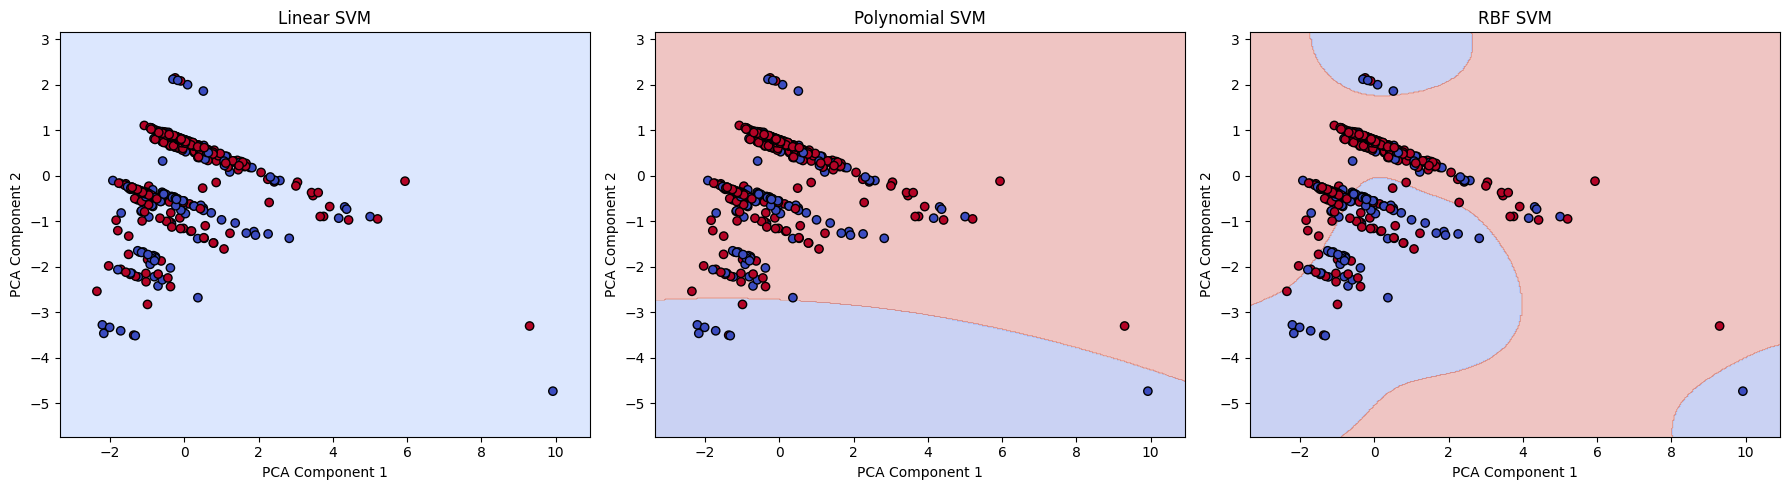

In [ ]:
# Linear vs Polynomial vs RBF SVM — SIDE BY SIDE (ONE CELL)

from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# PCA to 2D (for visualization only)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Models
models = {
    "Linear SVM": SVC(kernel='linear', C=1),
    "Polynomial SVM": SVC(kernel='poly', degree=3, C=1, gamma='scale'),
    "RBF SVM": SVC(kernel='rbf', C=1, gamma='scale')
}

# Mesh grid
x_min, x_max = X_pca[:,0].min() - 1, X_pca[:,0].max() + 1
y_min, y_max = X_pca[:,1].min() - 1, X_pca[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

# Plot
plt.figure(figsize=(18,5))

for i, (title, model) in enumerate(models.items(), 1):
    model.fit(X_pca, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X_pca[:,0], X_pca[:,1],
                c=y_train, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


The RBF kernel handles non-linear patterns best due to its ability to create flexible decision boundaries in infinite-dimensional space. It also generalizes best on unseen data when properly tuned. The linear kernel performs well only for linearly separable data, while the polynomial kernel can capture non-linearity but is prone to overfitting.